### 목표
- 손글씨 데이터를 분류하는 딥러닝 모델을 설계해보자
- 0~9까지 총 10개의 클래스를 가진다
- 다중분류 딥러닝 모델링을 설계해보자

In [ ]:
# 기본라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 데이터 로딩
# keras 에서 제공해주는 손글씨 데이터 불러오기
from tensorflow.keras.datasets import mnist

In [ ]:
# 데이터가 내부적으로 분리되어있음. 변수에 담아주기
(X_train, y_train), (X_test,y_test) = mnist.load_data()

In [ ]:
# 데이터 크기확인
X_train.shape, y_train.shape
# 학습용 데이터 6만장
# 28*28 픽셀을 가지는 데이터
# 픽셀: 사진의 정보를 가지는 단위 (작은사각형 1개 1픽셀)

((60000, 28, 28), (60000,))

In [ ]:
# 테스트 데이터 확인
X_test.shape, y_test.shape
# 1만장 데이터 테스트용 데이터

((10000, 28, 28), (10000,))

In [ ]:
# 정답데이터 확인
np.unique(y_train)
# 0~9 까지의 숫자를 정답으로 가진다
# 10개의 클래스를 가진다 -> 다중분류

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

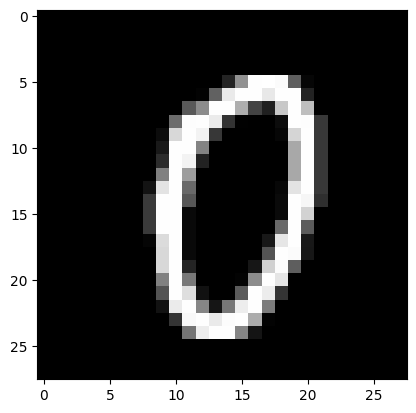

In [ ]:
# 사진데이터 확인
plt.imshow(X_train[1000], cmap='gray')
# 흑백사진
# 한개의 픽셀이 0~255 사이의 값을 가진다
# 0: 검정색, 255: 흰색

In [ ]:
y_train[1000]

0

### MLP(다층퍼셉트론, Multi Layer Perceptron) 모델링
- 입력층의 구조, 출력층의 구조를 일단 판단하여야 한다
- 학습능력을 위한 중간층의 깊이 고려
- loss, optimizer(최적화 알고리즘) 어떻게 설정할지
- 학습결과 시각화하여 일반화 판별

In [ ]:
from tensorflow.keras import Sequential # 뼈대
from tensorflow.keras.layers import Dense, InputLayer, Flatten
# Dense: 중간층, 출력층 에서 퍼셉트론을 묶음으로 표현하는 클래스
# InputLayer: 입력층설정 (데이터의 입력형태를 설정)
# Flatten: 2차원의 사진데이터를 1차원으로 표현해주기 위한 클래스
# 2차원데이터를 평평하게 1차원으로 변경
# 현재 우리의 사진데이터셋은 2차원 (28,28) -> 1차원 (선형모델학습을 위함)

In [ ]:
# 1. 모델설계
model = Sequential() # 뼈대 생성
# 입력층
model.add(InputLayer(input_shape=(28,28))) # 28*28 2차원 데이터
model.add(Flatten()) # 2차원의 사진데이터를 1차원으로 변경 (선형모델학습을 위함)
# 중간층
model.add(Dense(units=16, activation='sigmoid'))
model.add(Dense(units=8, activation='sigmoid'))
# 출력층
model.add(Dense(units = 10, activation='softmax'))
# 회귀: 연속적인 값 1개 예측 units = 1
# 이진분류: 인지 아닌지 예측, 확률값 1개필요 units = 1
# 다중분류: 클래스(동그라미 세모) 갯수 만큼의 확률값 필요, units = 클래스 개수
# 손글씨 데이터 0~9 총 10개의 클래스를 가진다!

# 다중분류의 활성화함수: softmax (규칙)
# 다중분류는 클래스개수만큼의 확률 출력 -> 확률값의 총 합이 1이 되도록 변환 (softmax)
# 변환한 값들 중 확률이 가장 높은 클래스로 예측

### 활성화 함수
- 중간층: 인간의 신경망을 모방하기 위해서 사용
-> 역치(활성화,비활성화)
  - 초기: stepfunction
  - 변화: sigmoid(기울기가 있어서 ~ 분석이 가능하기때문)
- 출력층: 예측결과의 형태를 지정
  - 회귀: linear (항등함수, y=x 선형모델이 예측한 데이터를 그대로 출력) 지정하지 않으면 기본값
  - 이진분류: sigmoid, 0~1 사이의 값으로 도출
  - 다중분류: softmax, 클래스의 개수만큼의 확률값 전체 총합을 1로 변환

In [ ]:
# 2. 모델의 학습방법 및 평가방법
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'SGD',
              metrics = ['accuracy'])

# loss: 학습하는 과정에서 모델이 얼마나 틀렸는지 수치화
# 회귀: mean_squared_error 사용
# 분류: crossentropy 사용 -> 분류데이터 특성상 mse 오차로 사용할 경우 loss 계산이 잘 안됨
# 이진분류: binary_crossentropy 사용
# 다중분류: categorical_crossentropy 사용

In [ ]:
# 3. 모델학습
# h1 = model.fit(X_train, y_train,
#                validation_split = 0.2,
#                epochs = 20) # 20번 돌리기

# 오류발생!!
# 오류를 확인해봤더니 -> 정답데이터의 shape 불일치
# y_train 데이터 형태 확인 실제 정답 1개 (클래스 10개중 1개)
# 모델링 후 출력결과: 10개 클래스에 대해서 각각의 확률값
# 1개와 10개는 비교 불가능

In [ ]:
# 학습용 정답데이터 확인
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# 오류를 해결하는 2가지 방법
#[방법1. 정답데이터 y_train을 10개의 확률값 형태로 변경]
#[방법2. compile 과정에서 loss 설정 > 'sparse_categorical_crossentropy']

In [ ]:
#[방법1. 정답데이터 y_train을 10개의 확률값 형태로 변경]
from tensorflow.keras.utils import to_categorical
# 범주형데이터를 확률값으로 변경
y_train_onehot = to_categorical(y_train)
y_train_onehot[:2]

# 첫번째 데이터를 보면
# 5 클래스, 5일 확률 100%, 나머지 클래스일 확률을 0% 변환

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# 오류 수정 후 재학습
h1 =model.fit(X_train,y_train_onehot,  # 변환한 정답데이터 사용
              validation_split = 0.2,
              epochs = 20)

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 2.0471 - accuracy: 0.4378 - val_loss: 1.8566 - val_accuracy: 0.5613
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6788 - accuracy: 0.5792 - val_loss: 1.4989 - val_accuracy: 0.6176
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 1.3699 - accuracy: 0.6522 - val_loss: 1.2410 - val_accuracy: 0.6967
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 1.1520 - accuracy: 0.7173 - val_loss: 1.0376 - val_accuracy: 0.7492
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0038 - accuracy: 0.7610 - val_loss: 0.9537 - val_accuracy: 0.7722
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8930 - accuracy: 0.7799 - val_loss: 0.8315 - val_accuracy: 0.8002
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8276 - accuracy: 0.7746 - val_loss: 0.7680 - val_accuracy:

In [ ]:
#[방법2. compile 과정에서 loss 설정 > 'sparse_categorical_crossentropy']
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'SGD',
              metrics = ['accuracy'])
# 오차를 계산할 때 알아서 확률값으로 변경해서 비교
# 선생님은 이거씀

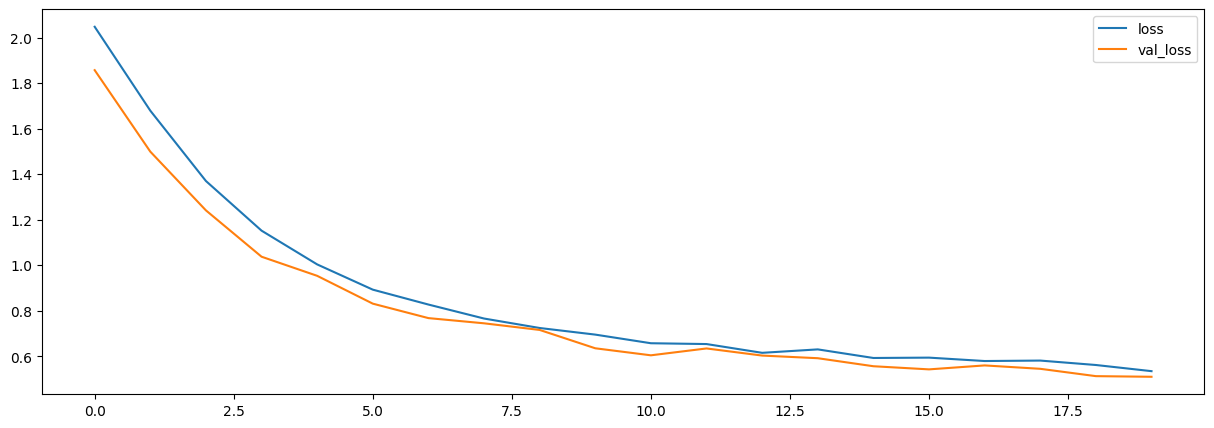

In [ ]:
# 학습결과 시각화
plt.figure(figsize=(15,5))
plt.plot(h1.history['loss'], label = 'loss')
plt.plot(h1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
# 모델 평가
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5185 - accuracy: 0.8593


[0.5185330510139465, 0.8593000173568726]

### 스스로 모델링작업진행
- model2
- 중간층 깊게 쌓아보기
- 5층 (64, 128 ,256, 128 ,64)
1. 모델구조설계
2. 학습방법, 평가방법 설정
3. 학습
4. 평가
5. 결과시각화

In [ ]:
model2 = Sequential()
model2.add(InputLayer(input_shape = (28,28)))
model2.add(Flatten())

model2.add(Dense(units=64, activation='sigmoid'))
model2.add(Dense(units=128, activation='sigmoid'))
model2.add(Dense(units=256, activation='sigmoid'))
model2.add(Dense(units=128, activation='sigmoid'))
model2.add(Dense(units=64, activation='sigmoid'))

model2.add(Dense(units=10, activation='softmax'))

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
h2 = model2.fit(X_train, y_train, validation_split = 0.2, epochs = 20)
model2.evaluate(X_test,y_test)

Epoch 1/20
1500/1500 [==============================] - 10s 6ms/step - loss: 2.3044 - accuracy: 0.1101 - val_loss: 2.3030 - val_accuracy: 0.1035
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3015 - accuracy: 0.1123 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3007 - accuracy: 0.1131 - val_loss: 2.3016 - val_accuracy: 0.1060
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3001 - accuracy: 0.1149 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 2.2992 - accuracy: 0.1187 - val_loss: 2.2997 - val_accuracy: 0.0995
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 2.2984 - accuracy: 0.1191 - val_loss: 2.2992 - val_accuracy: 0.1060
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 2.2969 - accuracy: 0.1229 - val_loss: 2.2975 - val_accuracy

[1.1939916610717773, 0.6238999962806702]

### 결과 정리
- 중간층의 깊이를 깊게 쌓을수록 성능이 좋아져야하는데
- 동일한 데이터, 동일한 활성화함수(sigmoid), 동일한 최적화함수(SGD)를 사용했음에도 성능차이가 많이 나는 이유는?
- 중간층의 활성화 함수로 sigmoid 함수를 사용하여 깊은층을 설계하였을때 발생하는 문제인 "기울기소실(Vanishing Gradient)
- 오차가 감해지는 현상, 입력층의 오차가 손실
-> 오차가 없는것처럼 보임

- sigmoid -> relu

In [ ]:
model2 = Sequential()
model2.add(InputLayer(input_shape = (28,28)))
model2.add(Flatten())

model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=256, activation='relu'))
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=64, activation='relu'))

model2.add(Dense(units=10, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

h2 = model2.fit(X_train, y_train, validation_split = 0.2, epochs = 20)
model2.evaluate(X_test,y_test)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 12.1366 - accuracy: 0.0985 - val_loss: 12.2026 - val_accuracy: 0.0995
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 12.3188 - accuracy: 0.0985 - val_loss: 12.2026 - val_accuracy: 0.0995
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 12.3188 - accuracy: 0.0985 - val_loss: 12.2026 - val_accuracy: 0.0995
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 12.3188 - accuracy: 0.0985 - val_loss: 12.2026 - val_accuracy: 0.0995
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 12.3188 - accuracy: 0.0985 - val_loss: 12.2026 - val_accuracy: 0.0995
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 12.3188 - accuracy: 0.0985 - val_loss: 12.2026 - val_accuracy: 0.0995
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 12.3188 - accuracy: 0.0985 - val_loss: 12.2026 -

[12.35225772857666, 0.09799999743700027]

In [ ]:
model3 = Sequential()
model3.add(InputLayer(input_shape = (28,28)))
model3.add(Flatten())

model3.add(Dense(units=64, activation='sigmoid'))
model3.add(Dense(units=128, activation='sigmoid'))
model3.add(Dense(units=256, activation='sigmoid'))
model3.add(Dense(units=128, activation='sigmoid'))
model2.add(Dense(units=64, activation='sigmoid'))

model3.add(Dense(units=10, activation='relu'))

model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

h3 = model3.fit(X_train, y_train, validation_split = 0.2, epochs = 20,
                batch_size=64) # 한번의 업데이트시 사용하는 데이터 수
model2.evaluate(X_test,y_test)